# extrapolating iphone's lens' horizontal position
## steps:
start from iphone's template parameters, <br>
extrapolate to samsungs' lens horizontal range, <br>
see how bignet's confidence react to such change.

## output:
in extrapolation/iphone_lens1p, multiple (100) SVGs from left->right
in extrapolation/iphone_lens1p/trained_bignet1_naug_norm.pt, brand-related ablation results, <br>
and lens position (x.pkl) - confidence (y.pkl) pair, which can also be found [here](https://drive.google.com/file/d/1_PW1iwhUe9Weki3n8j_7kg9ctlAZqAeK/view?usp=sharing)

In [1]:
import util as u
import numpy as np
import os
import copy

In [2]:
# pkl_folder="pkl"
fig_folder="figure"
iphone_folder="iphone"
# samsung_folder="samsung"
iphone_par=u.load_item("iphone_par.pkl")
# samsung_par=u.load_item("samsung_par.pkl")

In [3]:
import matplotlib.pyplot as plt
extra_folder="extrapolation"
iphone_folder=extra_folder+"/iphone_lens1p"
u.initialize([iphone_folder])

iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,1]]]))
iphone_ref["notch_random"][0][0]=1
iphone_ref["vshift"][0][0]=4.5
iphone_ref["scr2pl"][0][0]=1.2
iphone_ref["fillet"][0][0]=5
iphone_ref["lens1"][0][0]=1.5
iphone_ref["notch_r2"][0][0]=1

iphone_observe=copy.deepcopy(iphone_ref)
data_size=(1,100)
target="lens1p"
low, up = -0.38, 1.38
target_array=np.linspace(low, up, data_size[1])

for i in iphone_observe:
    if i=="lens_random":
        iphone_observe[i]=np.ones((data_size[0],data_size[1],4))*\
        np.array([0,0,0,1])
    elif iphone_ref[i][0][0]==None:
        iphone_observe[i]=np.zeros(data_size)
    elif i==target:
        iphone_observe[i]=\
        np.expand_dims(target_array,0)
    else:
        iphone_observe[i]=np.ones(data_size)*iphone_ref[i][0][0]
        
u.create_iphone_dataset(iphone_observe, iphone_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0)


iphone_path=u.get_filelist(dir,iphone_folder)

#exclude the generated other curves
exclude_group=[ x for x in iphone_path if "group" not in x ]
exclude=[ x for x in exclude_group if "curve" not in x ]
exclude_sorted=u.sort_list(exclude)

pred_rec=[]
model_path="trained_bignet1_naug_norm.pt"

for pic_path in exclude_sorted:
    iphone_acc, iphone_pred=u.test1svg(model_path, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path,\
                                      mode="norm", temp_seed=0)
    pred_rec.append(iphone_pred[0][0])

left_bound, right_bound=0.04, 0.96
# plt.figure(figsize=(20,10))
# plt.vlines(left_bound, -0.01,1.01,color="red")
# plt.vlines(right_bound, -0.01,1.01,color="red")
# plt.vlines(0.3, -0.01,1.01,color="orange")
# plt.vlines(0.7, -0.01,1.01,color="orange")
# plt.hlines(0.5, low-0.01, up+0.01,color="red")
# plt.axis((low-0.05,up+0.05,0,1.001))
# plt.plot(target_array, pred_rec, linewidth=3)

In [5]:
x_path = "%s/%s/x.pkl"%(iphone_folder,model_path)
y_path = "%s/%s/y.pkl"%(iphone_folder,model_path)
u.dump_item(target_array, x_path)
u.dump_item(pred_rec, y_path)

# plotting the confidence with individual brand's range

In [6]:
target_array = u.load_item(x_path)
pred_rec=u.load_item(y_path)

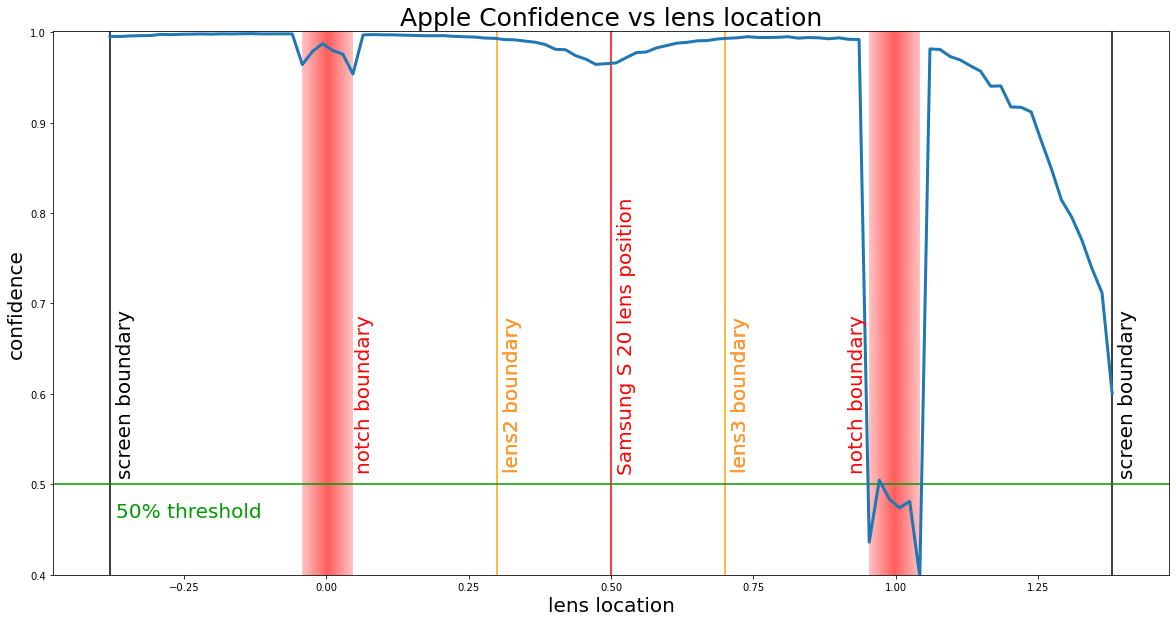

In [9]:
extra_folder="lens1p"
title="Apple Confidence vs lens location"
plt.figure(figsize=(20,10))

plt_lrange=-0.38
plt_rrange=1.38

plt.text(left_bound+0.01, 0.6, 'notch boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])
u.plot_rainbow(target_array[19], target_array[24], interval=2e-3, color=[1,0.2,0.2])
plt.text(right_bound-0.01, 0.6, 'notch boundary', ha='right',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])

u.plot_rainbow(target_array[75], target_array[80], interval=2e-3, color=[1,0.2,0.2])

plt.vlines(0.3, -0.01,1.01,color="orange")
plt.vlines(0.7, -0.01,1.01,color="orange")

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.vlines(plt_lrange, -0.01,1.01,color="black")
plt.vlines(plt_rrange, -0.01,1.01,color="black")

plt.text(plt_lrange+0.01, 0.6, 'screen boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[0,0,0])
plt.text(plt_rrange+0.01, 0.6, 'screen boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[0,0,0])

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.vlines(0.5, -0.01,1.01,color=[1,0,0])
plt.text(0.51, 0.665, 'Samsung S 20 lens position', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.6,0])
plt.text(low+0.01, 0.47, '50% threshold', ha='left',\
         va='center', fontsize=20, color=[0,0.6,0])


plt.axis((low-0.1,up+0.1,0.4,1.001))
plt.title(title, fontsize=25)
plt.xlabel("lens location", fontsize=20)
plt.ylabel("confidence", fontsize=20)

plt.plot(target_array, pred_rec, linewidth=3)
plt.savefig("%s.jpg"\
            %(title), bbox_inches='tight')

u.dump_item(target_array,"x.pkl")
u.dump_item(pred_rec,"y.pkl")